In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [3]:
%matplotlib inline

In [4]:
samples = np.random.random([1000000,2])
samples = samples*2 -1
unit_circle = []
for i in samples:
    if (i[0]**2 + i[1]**2) <=1:
        unit_circle += [i]
unit_circle = np.asarray(unit_circle)

## Calculando as distribuições de distância do ponto que dista r da origem no circulo unitário
Aqui lembrando de considerar que o círculo unitário é preenchido uniformemente por pontos

In [5]:
STEPS = np.arange(0,1.05,0.05)
BEANS = 100
beans_x = np.arange(0,2,2/BEANS)

In [6]:
def make_distance_histogram(x_position, nbeans, sample_of_unit_circle):
    histogram = np.zeros(nbeans)
    gap_size = 2/nbeans
    for i in sample_of_unit_circle:
        dist = np.sqrt((x_position - i[0])**2 + (i[1])**2)
        bean = int((dist/gap_size))
        histogram[bean] = histogram[bean] + 1
    return histogram
    

In [7]:
histograms = []
for i in STEPS:
    print("Calcula histograma para distancia " + str(i) + " da origem")
    histograms += [make_distance_histogram(i,BEANS,unit_circle)]

Calcula histograma para distancia 0.0 da origem
Calcula histograma para distancia 0.05 da origem
Calcula histograma para distancia 0.1 da origem
Calcula histograma para distancia 0.15000000000000002 da origem
Calcula histograma para distancia 0.2 da origem
Calcula histograma para distancia 0.25 da origem
Calcula histograma para distancia 0.30000000000000004 da origem
Calcula histograma para distancia 0.35000000000000003 da origem
Calcula histograma para distancia 0.4 da origem
Calcula histograma para distancia 0.45 da origem
Calcula histograma para distancia 0.5 da origem
Calcula histograma para distancia 0.55 da origem
Calcula histograma para distancia 0.6000000000000001 da origem
Calcula histograma para distancia 0.65 da origem
Calcula histograma para distancia 0.7000000000000001 da origem
Calcula histograma para distancia 0.75 da origem
Calcula histograma para distancia 0.8 da origem
Calcula histograma para distancia 0.8500000000000001 da origem
Calcula histograma para distancia 0.9

In [8]:
for i in range(len(histograms)):
    histograms[i] = histograms[i]/np.sum(histograms[i])

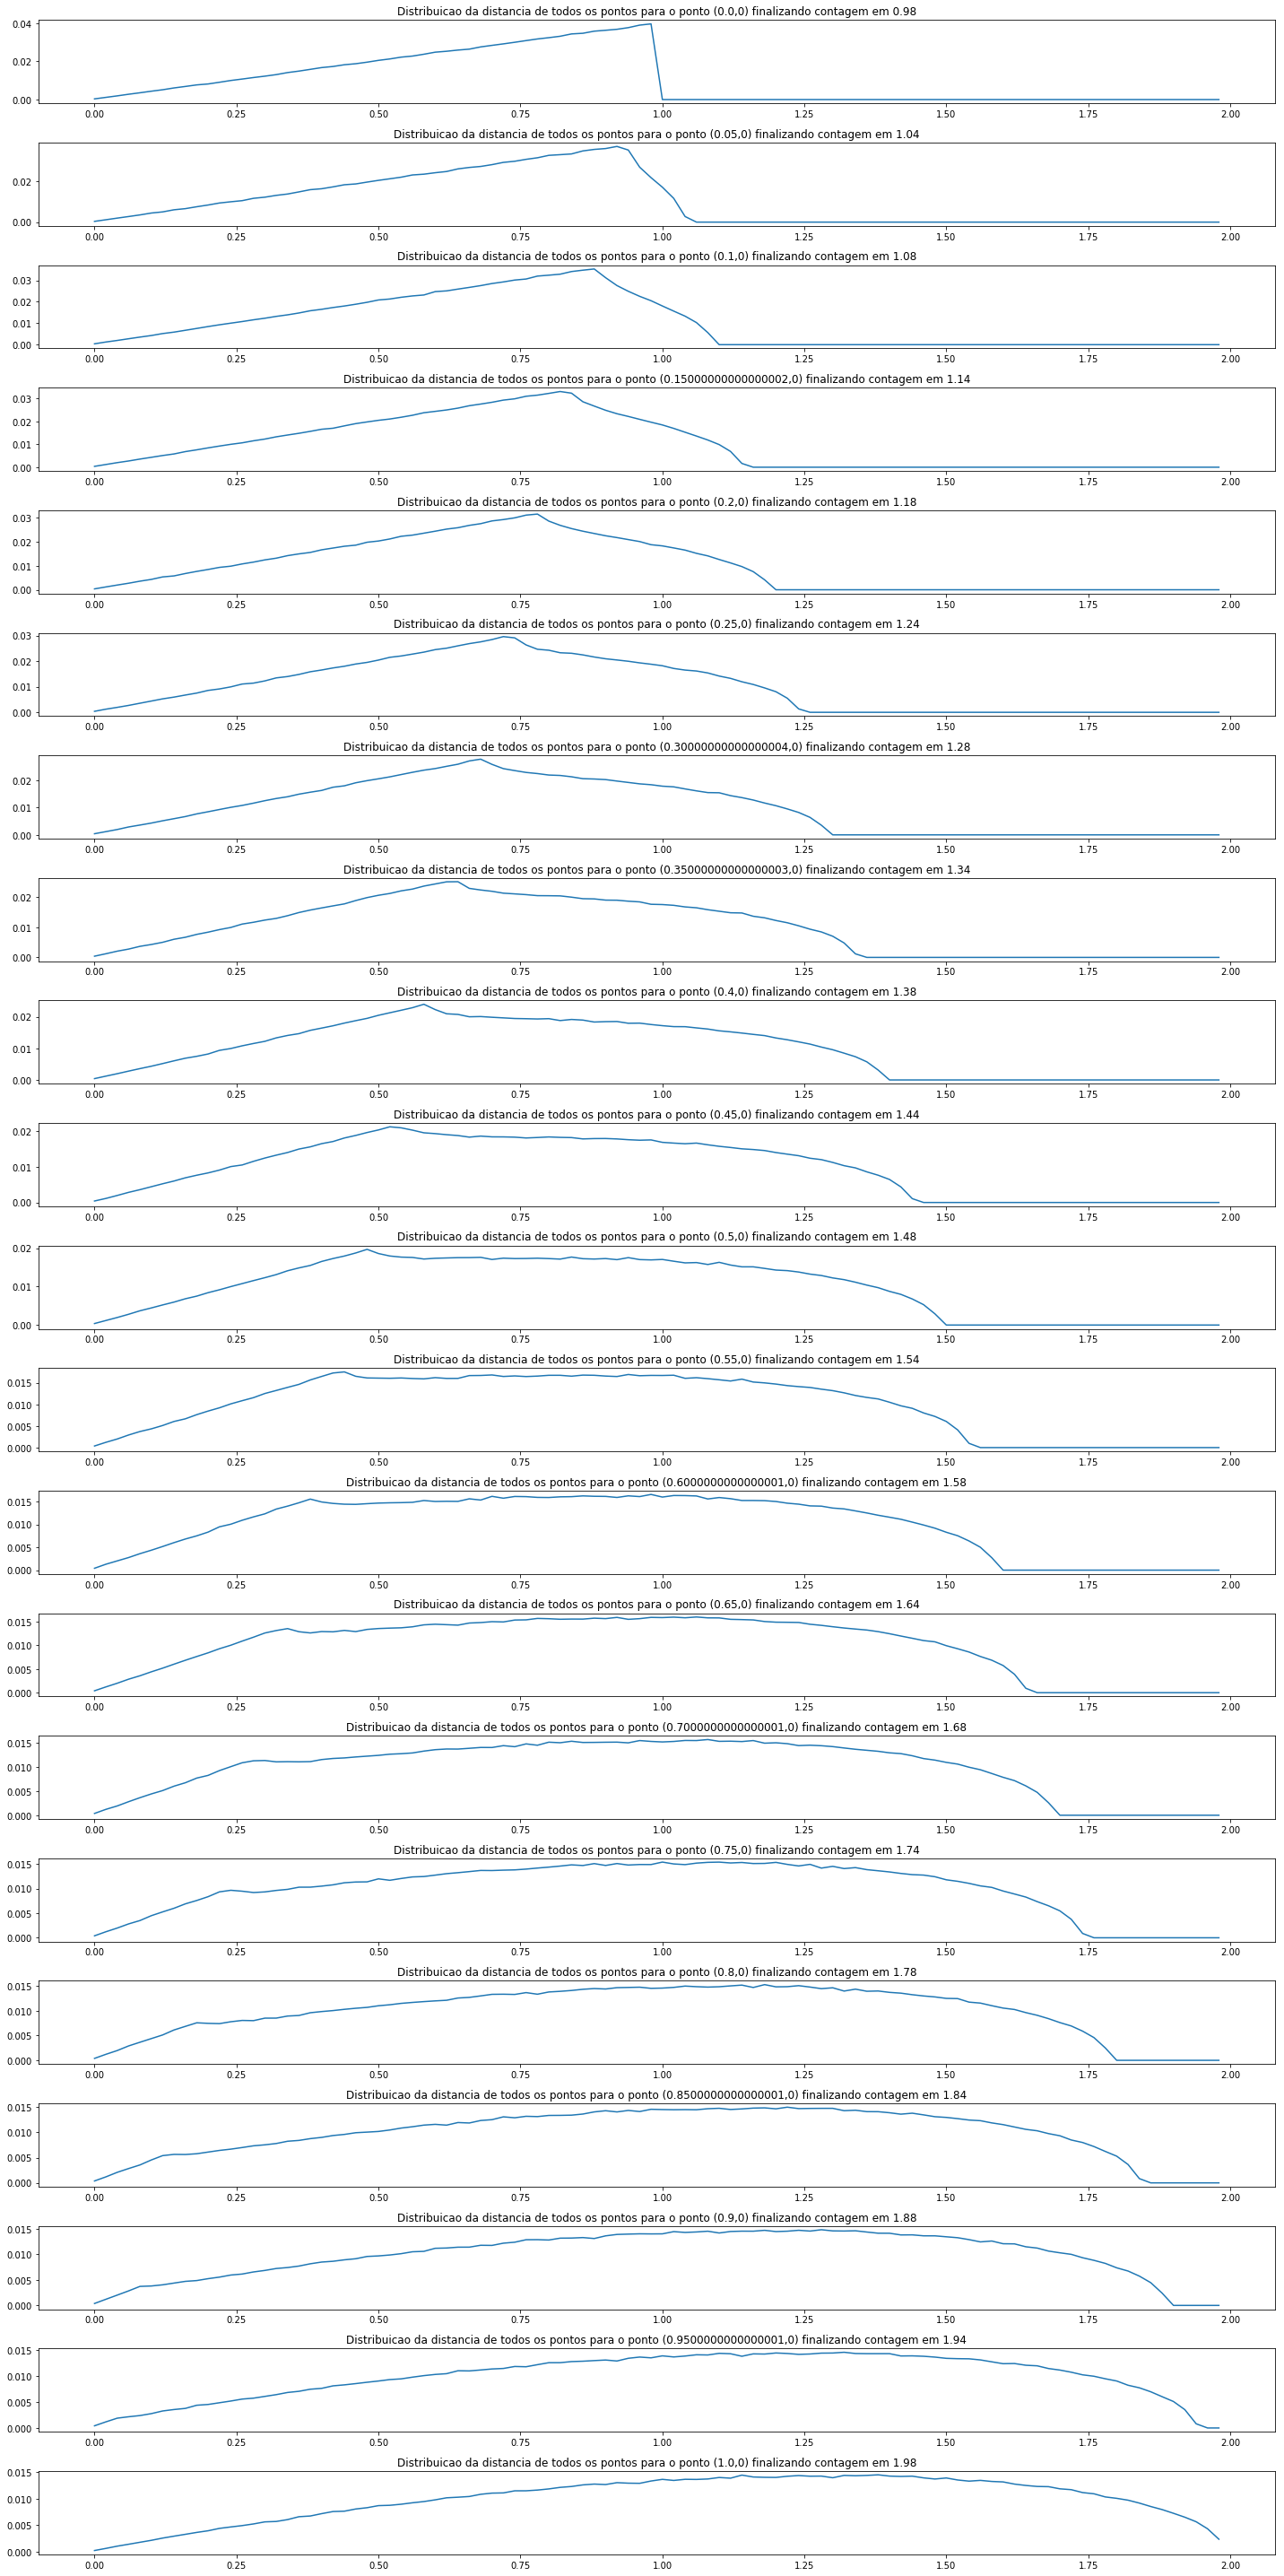

In [11]:
plt.figure(figsize=(20,40))
for i,step in enumerate(STEPS):
    plt.subplot(len(STEPS), 1,i+1)
    plt.plot(beans_x, histograms[i].tolist())
    n = len(histograms[i]) - 1
    k = histograms[i][n]
    while k==0:
        n = n-1
        k = histograms[i][n]
    plt.title("Distribuicao da distancia de todos os pontos para o ponto (" + str(step) + ",0) finalizando contagem em " + str((n)*2/BEANS))
plt.tight_layout() 
plt.show()

## Calculando a distribuições das maiores distancias em cada ponto

In [23]:
max_dist = []
for p in unit_circle:
    central_dist = np.sqrt(p[0]**2 + p[1]**2)
    max_dist += [central_dist+1]

In [24]:
y,x = np.histogram(max_dist,bins=100,range=(0,2.1))

In [25]:
y = y/np.max(y)

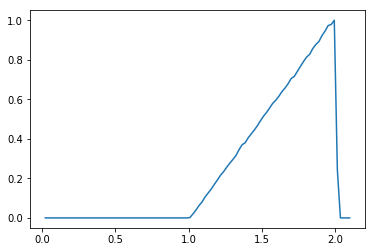

In [27]:
plt.plot(x[1:],y)